# 1. Recurrent Neuron
##### Sends output back to itself

# 2. Simple RNN with TensorFlow
### *Input formats of data

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# constants
num_inputs = 2
num_neurons = 3

In [3]:
#  placeholder
x0 = tf.placeholder(tf.float32,[None,num_inputs])
x1 = tf.placeholder(tf.float32,[None,num_inputs])

In [4]:
# variable
Wx = tf.Variable(tf.random_normal(shape = [num_inputs,num_neurons]))
Wy = tf.Variable(tf.random_normal(shape = [num_neurons,num_neurons]))
b = tf.Variable(tf.zeros([1,num_neurons]))

In [5]:
# Graphs
y0 = tf.tanh(tf.matmul(x0,Wx)+b)
y1 = tf.tanh(tf.matmul(y0,Wy)+tf.matmul(x1,Wx)+b)
init = tf.global_variables_initializer()

In [6]:
# Create Data
x0_batch = np.array([[0,1],[2,3],[4,5]])
x1_batch = np.array([[100,101],[102,103],[104,105]])

In [7]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        y0_output_vals,y1_output_vals = sess.run([y0,y1],
                                             feed_dict = {x0:x0_batch,x1:x1_batch})
        print('y0:'+str(y0_output_vals)+'\n')
        print('y1:'+str(y1_output_vals)+'\n')

y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]]

y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]]

y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]]

y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]]

y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]]

y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]


y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]]

y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]]

y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]]

y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]]

y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]]

y0:[[ 0.04332771 -0.06018258 -0.87746161]
 [ 0.95997131 -0.62681657 -0.99999815]
 [ 0.99909067 -0.88792974 -1.        ]]

y1:[[ 1. -1. -1.]


In [8]:
 y0_output_vals

array([[ 0.04332771, -0.06018258, -0.87746161],
       [ 0.95997131, -0.62681657, -0.99999815],
       [ 0.99909067, -0.88792974, -1.        ]], dtype=float32)

In [9]:
y1_output_vals

array([[ 1., -1., -1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.]], dtype=float32)

# 3.RNN with Tensorflow API


In [10]:
class TimeSeriesData():
    def __init__(self,num_points,xmin,xmax):
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin,xmax,num_points)
        self.y_true = np.sin(self.x_data)
    def ret_true(self,x_series):
        return np.sin(x_series)
    def next_batch(self,batch_size,steps,return_batch_ts = False):
        # Grab a random starting point for each batch
        rand_start = np.random.rand(1,batch_size)
        # Convert to be on time series
        ts_start = rand_start*(self.xmax - self.xmin - (steps*self.resolution))
        # Create batch time series on the x axis
        batch_ts = ts_start + np.arange(0.0,steps+1)*self.resolution
        # Create the Y data for time series
        y_batch = np.sin(batch_ts)
        # Formatting for RNN
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1,steps,1),y_batch[:,1:].reshape(-1,steps,1),batch_ts
        else:
            return y_batch[:,:-1].reshape(-1,steps,1),y_batch[:,1:].reshape(-1,steps,1)

In [11]:
ts_data = TimeSeriesData(250,0,10)

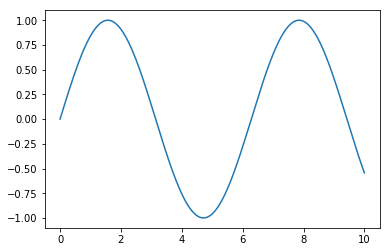

In [12]:
plt.plot(ts_data.x_data,ts_data.y_true)

In [13]:
num_time_steps = 30
y1,y2,ts = ts_data.next_batch(1,num_time_steps,True)

In [14]:
ts.shape

(1, 31)

In [15]:
ts.flatten

<function ndarray.flatten>

In [16]:
ts

array([[ 6.35377759,  6.39377759,  6.43377759,  6.47377759,  6.51377759,
         6.55377759,  6.59377759,  6.63377759,  6.67377759,  6.71377759,
         6.75377759,  6.79377759,  6.83377759,  6.87377759,  6.91377759,
         6.95377759,  6.99377759,  7.03377759,  7.07377759,  7.11377759,
         7.15377759,  7.19377759,  7.23377759,  7.27377759,  7.31377759,
         7.35377759,  7.39377759,  7.43377759,  7.47377759,  7.51377759,
         7.55377759]])

In [17]:
ts.shape

(1, 31)

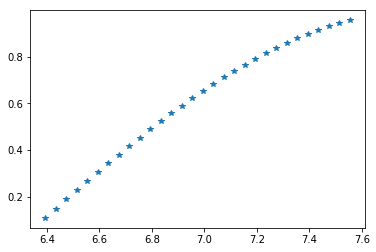

In [18]:
plt.plot(ts.flatten()[1:],y2.flatten(),'*')

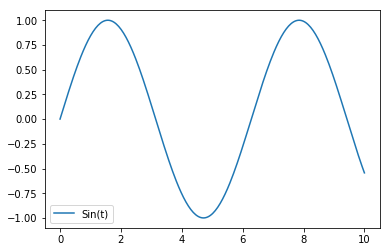

In [19]:
plt.plot(ts_data.x_data,ts_data.y_true,label = 'Sin(t)')
plt.legend()

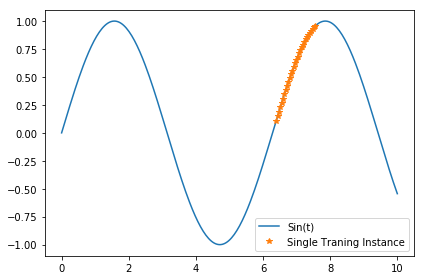

In [20]:
plt.plot(ts_data.x_data,ts_data.y_true,label = 'Sin(t)')
plt.plot(ts.flatten()[1:],y2.flatten(),'*',label = 'Single Traning Instance')
plt.legend()
plt.tight_layout()

In [21]:
# training data
train_inst = np.linspace(5,5+ts_data.resolution*(num_time_steps+1),num_time_steps+1)

In [22]:
train_inst

array([ 5.        ,  5.04133333,  5.08266667,  5.124     ,  5.16533333,
        5.20666667,  5.248     ,  5.28933333,  5.33066667,  5.372     ,
        5.41333333,  5.45466667,  5.496     ,  5.53733333,  5.57866667,
        5.62      ,  5.66133333,  5.70266667,  5.744     ,  5.78533333,
        5.82666667,  5.868     ,  5.90933333,  5.95066667,  5.992     ,
        6.03333333,  6.07466667,  6.116     ,  6.15733333,  6.19866667,
        6.24      ])

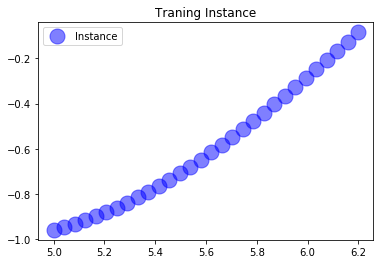

In [23]:
plt.title('Traning Instance')
plt.plot(train_inst[:-1],ts_data.ret_true(train_inst[:-1]),'bo',markersize=15,alpha=0.5,label = 'Instance')
plt.legend()

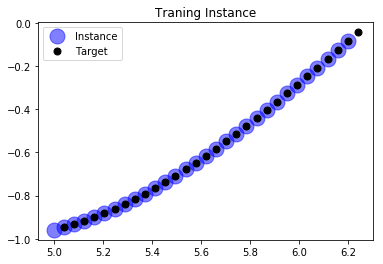

In [24]:
plt.title('Traning Instance')
plt.plot(train_inst[:-1],ts_data.ret_true(train_inst[:-1]),'bo',markersize=15,alpha=0.5,label = 'Instance')
plt.plot(train_inst[1:],ts_data.ret_true(train_inst[1:]),'ko',markersize = 7,label = 'Target')
plt.legend()

## Create the Model

In [25]:
tf.reset_default_graph()

In [40]:
num_input = 1
num_neurons = 100
num_outputs = 1
learning_rate = 0.0001
num_train_iterations = 2000
batch_size = 1

In [27]:
# placeholder
X = tf.placeholder(tf.float32,[None,num_time_steps,num_inputs])
y = tf.placeholder(tf.float32,[None,num_time_steps,num_outputs])